In [123]:
# Example snippets for posterity
# g_index

# g.columns
# g[["source_val_label_accuracy", "target_val_label_accuracy", "total_experiment_time_secs"]]
# g.columns
# g.index

# Grouping by parameters (minus seed) gives us the individual experiments as the groups
# p_group = p.groupby(parameter_columns_minus_seed)

# Can set a multi-index as well
# p_index = p.set_index(parameter_columns_minus_seed)
# p_index

# p["experiment_name"]

# Gett the max of each group
# idx = ["target_val_label_accuracy"].transform(max) == p["target_val_label_accuracy"]

# p_group.count()


# p[idx]

In [124]:
import pandas as pd
import seaborn as sb
import json
import os
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib



from steves_utils.summary_utils import (
    get_experiments_from_path
)

from steves_utils.utils_v2 import (
    get_experiments_base_path
)

In [125]:
PTN_SERIES = [
    "tuned_1v2",
    "baseline_ptn_32bit",
    "baseline_ptn",
    # "tl_3",
    # "tl_1",
    # "tl_2v2",
    "hyperparameters_3",
    # "cnn_2",
    # "cnn_3",
    "tuned_1",
    # "cnn_1",
    "hyperparameters_2",
    "hyperparameters_1",
    # "tl_3v2",
    # "tl_1v2",
    # "tl_2",
]

CNN_SERIES = [

]

TL_SERIES = [

]
def get_ptn_trials(experiments_to_get=PTN_SERIES):
    all_trials = []

    for experiment in experiments_to_get:
        trials = get_experiments_from_path(
            os.path.join(get_experiments_base_path(), experiment)
        )

        for t in trials:
            t["series_name"] = experiment
            for key, value in t["parameters"].items():
                t[key] = value
            del t["parameters"]

            for key, value in t["results"].items():
                t[key] = value
            del t["results"]

            for key, value in t.items():
                if type(value) == list:
                    t[key] = tuple(value)
        
        all_trials.extend(
            trials
        )

    return all_trials

In [126]:



ptn = get_ptn_trials()
ptn = pd.DataFrame(ptn)
ptn.columns

Index(['experiment_name', 'history', 'dataset_metrics', 'series_name',
       'device', 'lr', 'labels_source', 'labels_target',
       'episode_transforms_source', 'episode_transforms_target',
       'domains_source', 'domains_target',
       'num_examples_per_domain_per_label_source',
       'num_examples_per_domain_per_label_target', 'n_shot', 'n_way',
       'n_query', 'train_k_factor', 'val_k_factor', 'test_k_factor',
       'torch_default_dtype', 'n_epoch', 'patience', 'criteria_for_best',
       'x_net', 'NUM_LOGS_PER_EPOCH', 'BEST_MODEL_PATH', 'pickle_name',
       'x_transforms_source', 'x_transforms_target', 'dataset_seed', 'seed',
       'source_test_label_accuracy', 'source_test_label_loss',
       'target_test_label_accuracy', 'target_test_label_loss',
       'source_val_label_accuracy', 'source_val_label_loss',
       'target_val_label_accuracy', 'target_val_label_loss',
       'total_epochs_trained', 'total_experiment_time_secs', 'confusion',
       'per_domain_accuracy']

In [127]:
result_columns = [
    'history',
    'source_test_label_accuracy',
    'source_test_label_loss',
    'target_test_label_accuracy',
    'target_test_label_loss',
    'source_val_label_accuracy',
    'source_val_label_loss',
    'target_val_label_accuracy',
    'target_val_label_loss',
    'total_epochs_trained',
    'total_experiment_time_secs',
    'confusion',
    'per_domain_accuracy',
]

parameter_columns_minus_seed = [
    # 'experiment_name',
    # 'series_name',
    'device',
    'lr',
    'labels_source',
    'labels_target',
    'episode_transforms_source',
    'episode_transforms_target',
    'domains_source',
    'domains_target',
    'num_examples_per_domain_per_label_source',
    'num_examples_per_domain_per_label_target',
    'n_shot',
    'n_way',
    'n_query',
    'train_k_factor',
    'val_k_factor',
    'test_k_factor',
    'torch_default_dtype',
    'n_epoch',
    'patience',
    'criteria_for_best',
    'NUM_LOGS_PER_EPOCH',
    'BEST_MODEL_PATH',
    'pickle_name',
    'x_transforms_source',
    'x_transforms_target',
]

eh_columns = [
    'x_net',
    'dataset_metrics',
    'dataset_seed'
    'seed'
]

# Compare 32bit and 64bit precision results

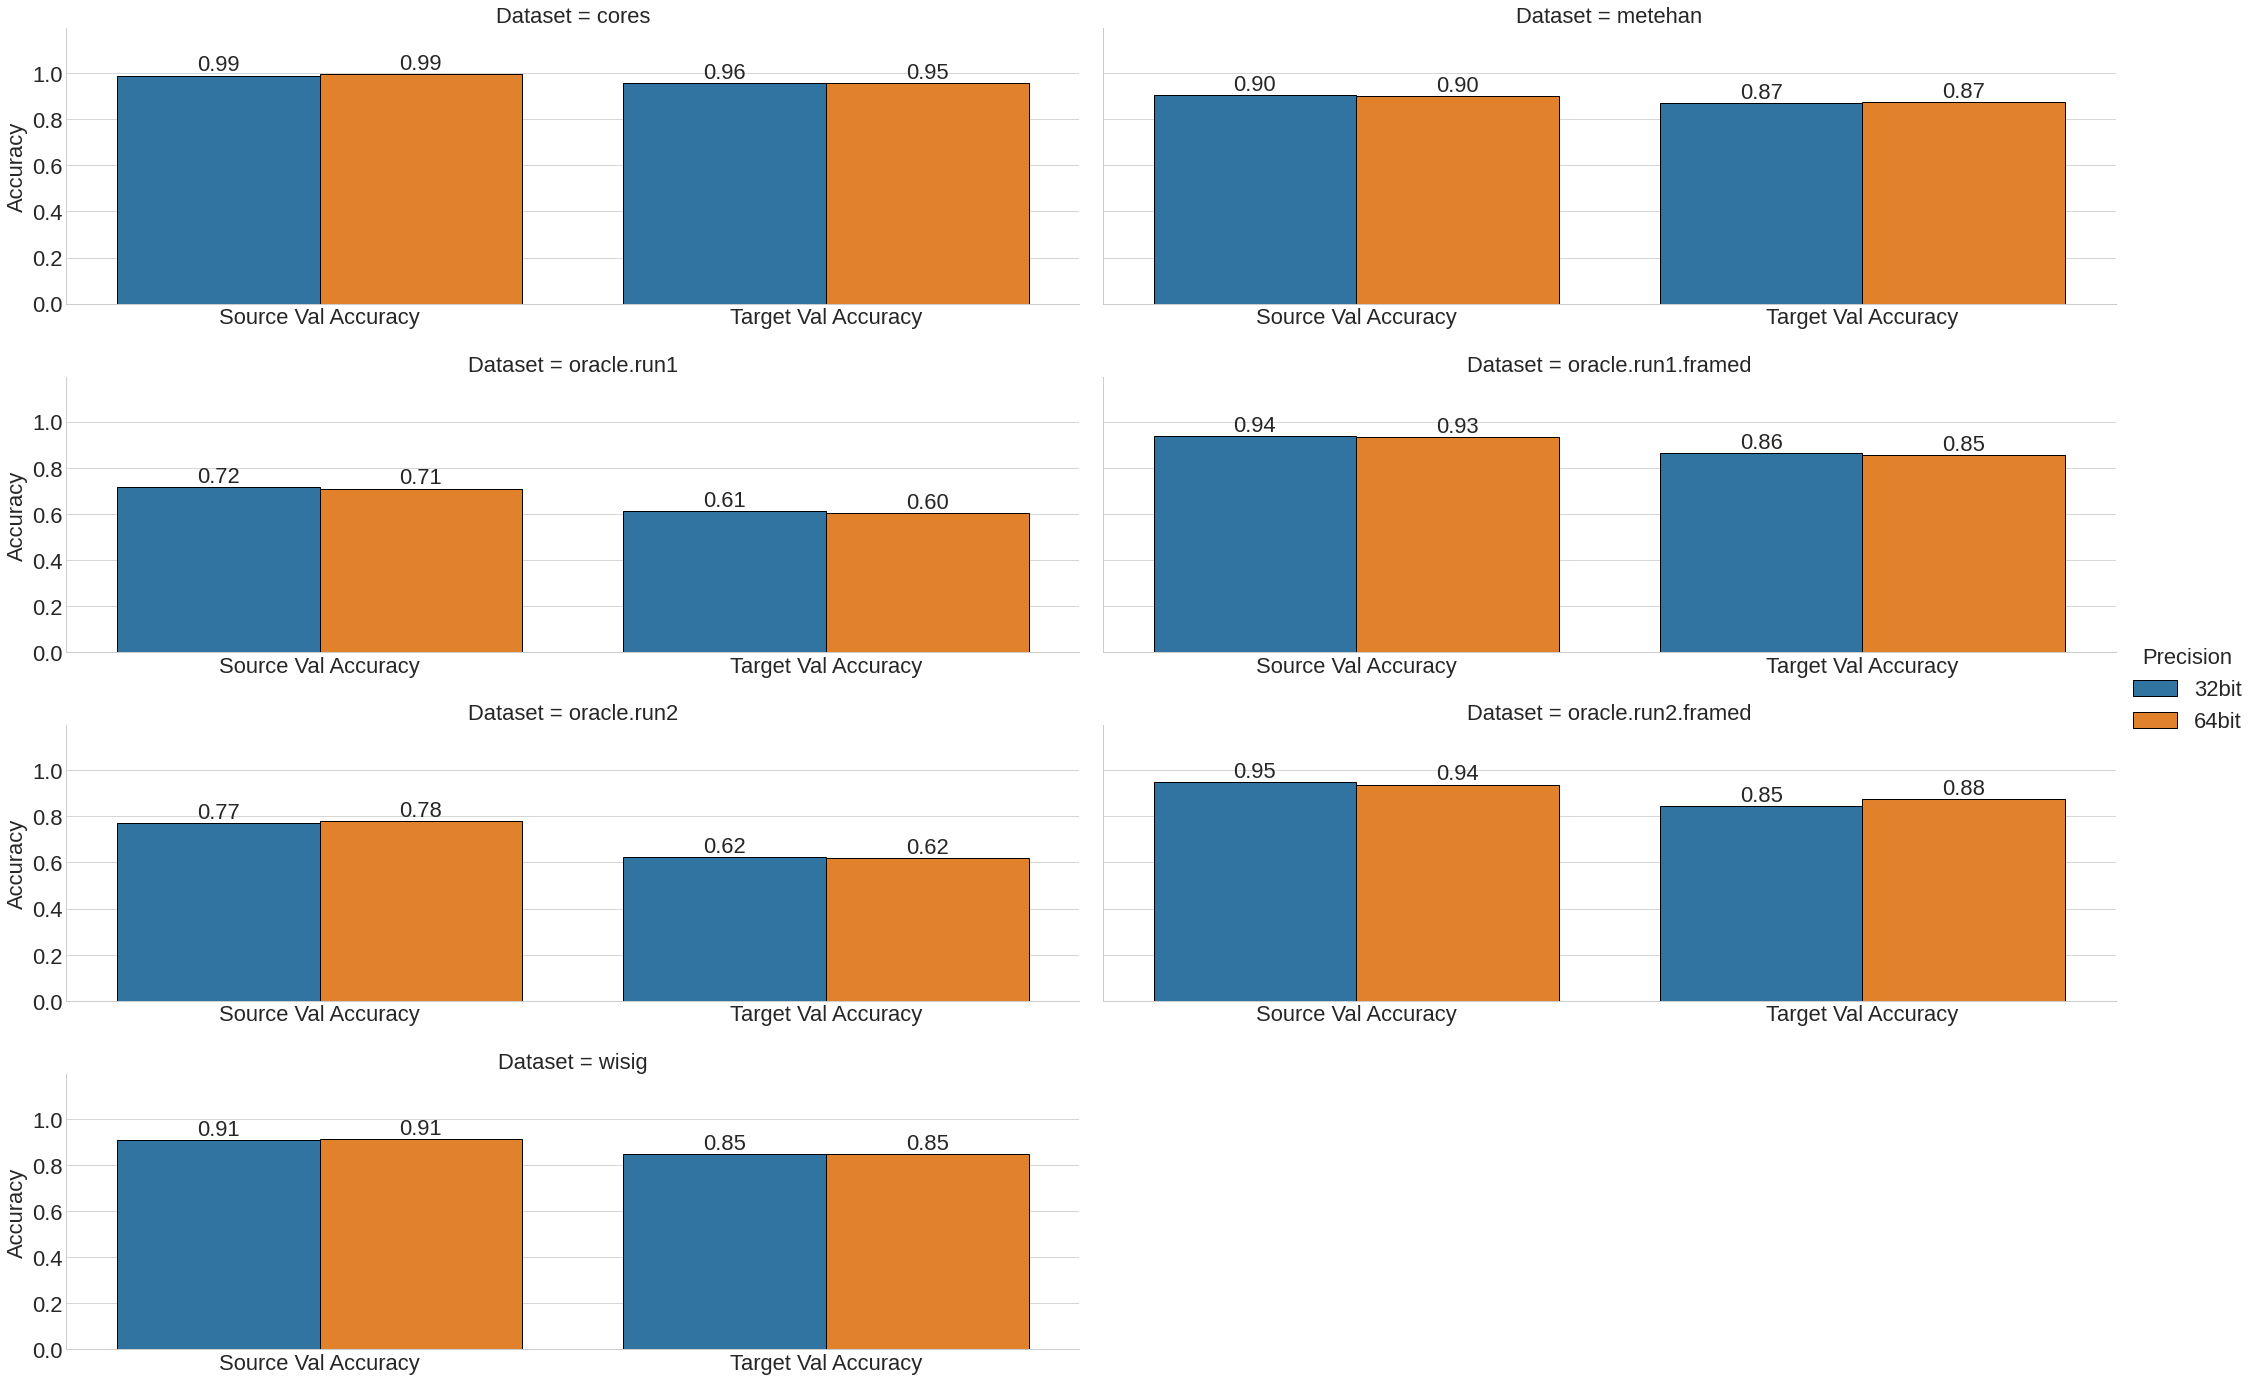

<Figure size 1080x3600 with 0 Axes>

In [128]:
# Get the trials only from the series we want
p = ptn[ptn["series_name"].isin(["baseline_ptn", "baseline_ptn_32bit"])]

# Drop columns we aren't interested in (They clutter up the view)
p = p.drop(columns=[
    "experiment_name",
    "series_name",
    "history",
    "source_test_label_loss",
    "target_test_label_loss",
    "source_val_label_loss",
    "target_val_label_loss",
    "confusion",
    "per_domain_accuracy",
    # "NUM_LOGS_PER_EPOCH",
    # "BEST_MODEL_PATH",
])


# Verify these are our only independent variables

# baseline_ptn is awkward since we have multiple of the same seed

independent_variables = ["pickle_name", "torch_default_dtype"]
other_variables = list(set(parameter_columns_minus_seed) - set(independent_variables))
p = p.set_index(independent_variables)

p = p.groupby(independent_variables)[["target_val_label_accuracy", "source_val_label_accuracy"]].max()

p = p.reset_index()

pickle_mapping = {
    "metehan.stratified_ds.2022A.pkl": "metehan",
    "wisig.node3-19.stratified_ds.2022A.pkl": "wisig",
    "cores.stratified_ds.2022A.pkl": "cores",
    "oracle.Run1_10kExamples_stratified_ds.2022A.pkl": "oracle.run1",
    "oracle.Run1_framed_2000Examples_stratified_ds.2022A.pkl": "oracle.run1.framed",
    "oracle.Run2_10kExamples_stratified_ds.2022A.pkl": "oracle.run2",
    "oracle.Run2_framed_2000Examples_stratified_ds.2022A.pkl": "oracle.run2.framed",
}

precision_mapping = {
    "torch.float64": "64bit",
    "torch.float32": "32bit",
}

# Create a new column by applying a lambda to each row
# axis=1 means apply the lambda to each row
# axis=0 means apply the lambda to each column
p["Dataset"] = p.apply(lambda row : pickle_mapping[row["pickle_name"]], axis=1)
p["Precision"] = p.apply(lambda row : precision_mapping[row["torch_default_dtype"]], axis=1)
p = p.rename(columns={"source_val_label_accuracy": "Source Val Accuracy", "target_val_label_accuracy": "Target Val Accuracy"})
p = p.drop(columns=["pickle_name", "torch_default_dtype"])

m = pd.melt(p, 
        id_vars=["Dataset", "Precision"],
        value_vars=[
            "Source Val Accuracy",
            "Target Val Accuracy",
        ],
        value_name="Accuracy"
    )

matplotlib.rcParams.update({'font.size': 22})
plt.style.use('seaborn-whitegrid')

fg = sb.catplot(x="variable", col="Dataset", y='Accuracy', hue='Precision', 
                        data=m, kind='bar', height=5, aspect=3, col_wrap=2, edgecolor = "black")
fg.set_xlabels('')
plt.figure(figsize=(15,50))

# iterate through axes
for ax in fg.axes.ravel():
    
    ax.tick_params(labelbottom=True)
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.2f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)


# Show Reproducability

In [129]:
# Get the trials only from the series we want
p = ptn[ptn["series_name"].isin(["baseline_ptn", "baseline_ptn_32bit"])]

# Drop columns we aren't interested in (They clutter up the view)
p = p.drop(columns=[
    "history",
    "source_test_label_loss",
    "target_test_label_loss",
    "source_val_label_loss",
    "target_val_label_loss",
    "confusion",
    "per_domain_accuracy",
    # "NUM_LOGS_PER_EPOCH",
    # "BEST_MODEL_PATH",
])

# Basically we don't want to rely on the experiment name, we want to parse our data solely on the parameters

# This creates a frame with the 'targets' as the columns, and the groupby params as a one deep multi-index
g = p.groupby(parameter_columns_minus_seed)[["source_val_label_accuracy", "target_val_label_accuracy", "total_experiment_time_secs"]].nunique()
g["Trial Count"] = p.groupby(parameter_columns_minus_seed).size()

# This flattens the multi-index back to columns
g = g.reset_index()

# Verify that pickle_name and torch_default_type uniquely index each row
for index, size in g.groupby(["pickle_name", "torch_default_dtype"]).size().iteritems():
    assert size == 1

pickle_mapping = {
    "metehan.stratified_ds.2022A.pkl": "metehan",
    "wisig.node3-19.stratified_ds.2022A.pkl": "wisig",
    "cores.stratified_ds.2022A.pkl": "cores",
    "oracle.Run1_10kExamples_stratified_ds.2022A.pkl": "oracle.run1",
    "oracle.Run1_framed_2000Examples_stratified_ds.2022A.pkl": "oracle.run1.framed",
    "oracle.Run2_10kExamples_stratified_ds.2022A.pkl": "oracle.run2",
    "oracle.Run2_framed_2000Examples_stratified_ds.2022A.pkl": "oracle.run2.framed",
}

precision_mapping = {
    "torch.float64": "64bit",
    "torch.float32": "32bit",
}

# Create a new column by applying a lambda to each row
# axis=1 means apply the lambda to each row
# axis=0 means apply the lambda to each column
g["Dataset"] = g.apply(lambda row : pickle_mapping[row["pickle_name"]], axis=1)
g["Precision"] = g.apply(lambda row : precision_mapping[row["torch_default_dtype"]], axis=1)

g_index = g.set_index(["Dataset", "Precision"])
g_index["N Unique source val accuracies"] = g_index["source_val_label_accuracy"]
g_index["N Unique target val accuracies"] = g_index["target_val_label_accuracy"]
g_index["N trials"] = g_index["Trial Count"]
g_index[["N Unique source val accuracies", "N Unique target val accuracies", "N trials"]]

N Unique source val accuracies  \
Dataset            Precision                                   
metehan            32bit                                   1   
                   64bit                                   1   
wisig              32bit                                   1   
                   64bit                                   1   
cores              32bit                                   1   
                   64bit                                   1   
oracle.run1        32bit                                   1   
oracle.run1.framed 32bit                                   1   
oracle.run2        32bit                                   1   
oracle.run2.framed 32bit                                   1   
oracle.run1        64bit                                   1   
oracle.run1.framed 64bit                                   1   
oracle.run2        64bit                                   1   
oracle.run2.framed 64bit                                   1   

                              N Unique target val accuracies  N trials  
Dataset            Precision                                            
metehan            32bit                                   1         3  
                   64bit                                   1         3  
wisig              32bit                                   1         3  
                   64bit                                   1         3  
cores              32bit                                   1         3  
                   64bit                                   1         3  
oracle.run1        32bit                                   1         3  
oracle.run1.framed 32bit                                   1         3  
oracle.run2        32bit                                   1         3  
oracle.run2.framed 32bit                                   1         3  
oracle.run1        64bit                                   1         3  
oracle.run1.framed 64bit                                   1         3  
oracle.run2        64bit                                   1         3  
oracle.run2.framed 64bit                                   1         3